In [1]:
# Preparations
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit
import seaborn as sns
from IPython.display import Latex
import warnings
from PrettyTable import PrettyTable
from functools import partial
from PrettyFigure import PrettyFigure
warnings.filterwarnings("ignore", module="matplotlib")
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['savefig.dpi'] = 75

# plt.rcParams['figure.autolayout'] = False
# plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True
plt.rcParams['font.family'] = "STIX"
plt.rcParams['text.latex.preamble'] = "\\usepackage{subdepth}, \\usepackage{type1cm}"

results = {}

sns.set(color_codes=True)

def average(data):
    return 1 / len(data) * sum(data)

def error(data, average_of_data):
    s = sum([(x - average_of_data)**2 for x in data])
    return math.sqrt(s / (len(data) * (len(data) - 1)))

def std_deviation(error_of_average, length_of_dataset):
    return error_of_average * math.sqrt(length_of_dataset)

def average_with_weights(data, weights):
    d = data
    w = weights
    return (d * w**-2).sum() / (w**-2).sum()

def error_with_weights(weights):
    w = weights
    return 1 / math.sqrt((w**-2).sum())

def wavg(group, avg_name, weight_name):
    d = group[avg_name]
    w = group[weight_name]
    return (d * w**-2).sum() / (w**-2).sum()

def werr(group, weight_name):
    return 1 / math.sqrt((group[weight_name]**-2).sum())

In [2]:
# Constants
c0 = 299792458 # [m / s]
f1 = 1 # [m]
f2 = 4.994 # [m]
s1 = 0.110 # [m]
s2 = 4.873 # [m]
f = 0 # [g / m^3]
fmax = 1 # [g / m^3]
phi = f / fmax
T = 0 # [K]
p = 0 # [Pa]

nn = 0
pn = 0 # [Pa]
Tn = 0 # [K]
beta = 4.292e-8 # [1 / mbar]
gamma = 3.43e-2 # [(nm)^2 / mbar]
lambda0 = 632.8 #[nm]
pw = f

#n = (nn - 1) * p * Tn / (pn * T) - (beta - gamma / lambda0**2) * pw + 1

#ctheoretisch = c0 / n # [m / s]

In [6]:
#x = (1 / c) * 2 * omega * (s2 + fs) * (2 * f1) + x0

# Read Data
dfb = pd.read_csv('data/measurements.csv')
ax = None
dfa = dfb.loc[dfb['observer'] == 'Almar']
dfn = dfb.loc[dfb['observer'] == 'Noah']

slopea, intercepta, sem, r, p = stats.linregress(dfa['f'], dfa['x'])
slopen, interceptn, sem, r, p = stats.linregress(dfn['f'], dfn['x'])

ax = dfa.plot(kind='scatter', x='f', y='x', label='gemessene Distanz [Almar]')
plt.plot(dfa['f'], dfa['f'] * slopea + intercepta, label='linearer Fit der Distanz [Almar]', axes=ax)
plt.plot(dfn['f'], dfn['f'] * slopen + interceptn, label='linearer Fit der Distanz [Noah]', axes=ax, color='red')
plt.scatter(dfn['f'], dfn['x'], label='gemessene Distanz [Noah]', axes=ax, color='red')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Strecke [m]')
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.2)

plt.close()
figure = PrettyFigure(
    ax.figure,
    label='fig:lichtgeschwindigkeiten_distanz_Almar',
    caption='Gemessene Distanzen. Dazu einen linearen Fit um die Mittlere Distanz zu bestimmen.'
)
figure.show()

c = (1 / ((slopen + slopea) / 2 / 1e4)) * 2 * 2 * math.pi * (s2 + f2) * (2 * f1)
print(c)

304783053.829


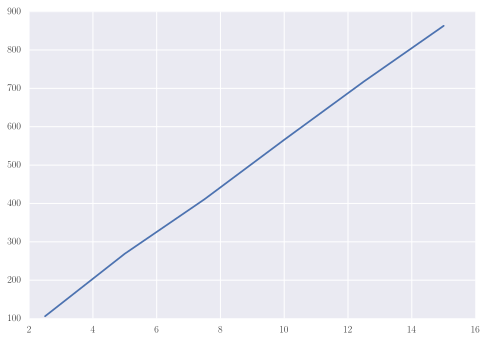

In [6]:
V = [15, 12.5, 10, 7.5, 5, 2.5]
rpm = [863, 718, 566, 411, 269, 106]

plt.plot(V, rpm)